In [8]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
np.random.seed(2021)

In [10]:
train_df = pd.read_csv("/content/imputed_train_whole_file.csv")
test_df = pd.read_csv("/content/imputed_test_whole_file.csv")

In [11]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [12]:
df = train_df.copy()
df = df.append(test_df)
neg, pos = np.bincount(df["y_true"])

In [13]:
total = neg + pos
print('Data Class count:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Data Class count:
    Total: 17917
    Positive: 2361 (13.18% of total)



In [14]:
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

In [15]:
train_labels = np.array(train_df.pop('y_true'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('y_true'))
test_labels = np.array(test_df.pop('y_true'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [16]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (11466,)
Validation labels shape: (2867,)
Test labels shape: (3584,)
Training features shape: (11466, 85)
Validation features shape: (2867, 85)
Test features shape: (3584, 85)


In [20]:
from sklearn.linear_model import LogisticRegression
logisticRegr_base = LogisticRegression(max_iter=10000)

In [21]:
logisticRegr_base.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
base_prediction = logisticRegr_base.predict(test_features)

In [23]:
base_prob_train = logisticRegr_base.predict_proba(train_features)

In [24]:
base_prob = logisticRegr_base.predict_proba(test_features)

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix

In [26]:
base_cm = confusion_matrix(test_labels, base_prediction)
print(base_cm)

[[3055   62]
 [ 379   88]]


In [27]:
# Pos label = 1
print("precison:")
print(precision_score(test_labels, base_prediction))
print("recall:")
print(recall_score(test_labels, base_prediction))
print("AUC:")
print(roc_auc_score(test_labels, base_prob[:, 1]))
print("F1:")
print(f1_score(test_labels, base_prediction))

precison:
0.5866666666666667
recall:
0.18843683083511778
AUC:
0.835706517893516
F1:
0.2852512155591572


In [28]:
# Pos label = 0
print("precison:")
print(precision_score(test_labels, base_prediction, pos_label=0))
print("recall:")
print(recall_score(test_labels, base_prediction, pos_label=0))
print("F1:")
print(f1_score(test_labels, base_prediction, pos_label=0))

precison:
0.8896330809551544
recall:
0.9801090792428617
F1:
0.9326820332773622


In [ ]:
logisticRegr = LogisticRegression(solver="liblinear", penalty="l1", max_iter=1000, class_weight="balanced")

In [13]:
logisticRegr.fit(test_X, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
score = logisticRegr.score(test_X, test_y)
print(score)

0.770042912608133


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [16]:
prediction = logisticRegr.predict(test_X)
prob = logisticRegr.predict_proba(test_X)

In [17]:
cm = metrics.confusion_matrix(test_y, prediction)
print(cm)

[[9836 2858]
 [ 518 1469]]


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, f1_score

In [19]:
print("precison:")
print(precision_score(test_y, prediction, pos_label=0))
print("recall:")
print(recall_score(test_y, prediction, pos_label=0))
print("AUC:")
print(roc_auc_score(test_y, prob[:, 1]))

precison:
0.9499710256905544
recall:
0.7748542618559949
AUC:
0.8363069578857817


In [20]:
print("precison:")
print(precision_score(test_y, prediction))
print("recall:")
print(recall_score(test_y, prediction))

precison:
0.339496186734458
recall:
0.739305485656769


In [21]:
prediction_train = logisticRegr.predict(train_X)
prob_train = logisticRegr.predict_proba(train_X)
cm_train = metrics.confusion_matrix(train_y, prediction_train)
print(cm_train)

[[2226  636]
 [  98  276]]


In [22]:
print("precison:")
print(precision_score(train_y, prediction_train, pos_label=0))
print("recall:")
print(recall_score(train_y, prediction_train, pos_label=0))
print("AUC:")
print(roc_auc_score(train_y, prob_train[:, 1]))

precison:
0.9578313253012049
recall:
0.7777777777777778
AUC:
0.8306614050232252


In [24]:
print("precison:")
print(precision_score(train_y, prediction_train))
print("recall:")
print(recall_score(train_y, prediction_train))

precison:
0.3026315789473684
recall:
0.7379679144385026


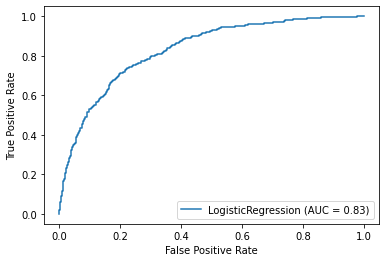

In [26]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logisticRegr, train_X, train_y)

In [ ]:
import pickle
filename = "saved_logistic.sav"
pickle.dump(logisticRegr, open(filename, "wb"))